In [1]:
!apt install aptitude

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aptitude-common libcgi-fast-perl libcgi-pm-perl libclass-accessor-perl
  libcwidget4 libencode-locale-perl libfcgi-perl libhtml-parser-perl
  libhtml-tagset-perl libhttp-date-perl libhttp-message-perl libio-html-perl
  libio-string-perl liblocale-gettext-perl liblwp-mediatypes-perl
  libparse-debianchangelog-perl libsigc++-2.0-0v5 libsub-name-perl liburi-perl
  libxapian30
Suggested packages:
  aptitude-doc-en | aptitude-doc apt-xapian-index debtags tasksel
  libcwidget-dev libdata-dump-perl libhtml-template-perl libxml-simple-perl
  libwww-perl xapian-tools
The following NEW packages will be installed:
  aptitude aptitude-common libcgi-fast-perl libcgi-pm-perl
  libclass-accessor-perl libcwidget4 libencode-locale-perl libfcgi-perl
  libhtml-parser-perl libhtml-tagset-perl libhttp-date-perl
  libhttp-message-perl libio-html-perl libio-st

In [2]:
!aptitude install git make curl xz-utils file -y
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 -y

git is already installed at the requested version (1:2.25.1-1ubuntu3.11)
make is already installed at the requested version (4.2.1-1.2)
curl is already installed at the requested version (7.68.0-1ubuntu2.18)
xz-utils is already installed at the requested version (5.2.4-1ubuntu1.1)
file is already installed at the requested version (1:5.38-4)
git is already installed at the requested version (1:2.25.1-1ubuntu3.11)
make is already installed at the requested version (4.2.1-1.2)
curl is already installed at the requested version (7.68.0-1ubuntu2.18)
xz-utils is already installed at the requested version (5.2.4-1ubuntu1.1)
file is already installed at the requested version (1:5.38-4)
No packages will be installed, upgraded, or removed.
0 packages upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
Need to get 0 B of archives. After unpacking 0 B will be used.
                            
The following NEW packages will be installed:
  libmecab-dev libmecab2{a} mecab mecab-ipadic{a

In [3]:
!pip install mecab-python3==0.7

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mecab-python3: filename=mecab_python3-0.7-cp310-cp310-linux_x86_64.whl size=204666 sha256=917c112087e0a70789252e2e779d074cfeb3423649057b7992869e88a9cccb6b
  Stored in directory: /root/.cache/pip/wheels/af/5c/2a/bb8c7ed306516444e25b06556edf0e8f0b82139b270eb4ce2d
Successfully built mecab-python3


In [4]:
import MeCab

In [5]:
m = MeCab.Tagger()
print(m.parse("すもももももももものうち"))

すもも	名詞,一般,*,*,*,*,すもも,スモモ,スモモ
も	助詞,係助詞,*,*,*,*,も,モ,モ
もも	名詞,一般,*,*,*,*,もも,モモ,モモ
も	助詞,係助詞,*,*,*,*,も,モ,モ
もも	名詞,一般,*,*,*,*,もも,モモ,モモ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
うち	名詞,非自立,副詞可能,*,*,*,うち,ウチ,ウチ
EOS



In [6]:
from collections import defaultdict
import re
import io
import urllib.request
from zipfile import ZipFile

In [9]:
def load_from_url(url):
    data = urllib.request.urlopen(url).read()
    zipdata = ZipFile(io.BytesIO(data))
    filename = zipdata.namelist()[0]
    text = zipdata.read(filename).decode("shift-jis")
    text = re.sub(r'［.*?］', '', text)
    text = re.sub(r'《.*?》', '', text)
    return text

In [10]:
URL = "https://www.aozora.gr.jp/cards/000119/files/624_ruby_5668.zip"
text = load_from_url(URL)
text.split()[0]

'山月記'

In [11]:
def show_top10(text):
    m = MeCab.Tagger()
    node = m.parseToNode(text)
    dic = defaultdict(int)
    while node:
        a = node.feature.split(",")
        key = node.surface
        if a[0] == u"名詞" and a[1] == u"一般" and key != "":
            dic[key] += 1
        node = node.next
    for k, v in sorted(dic.items(), key=lambda x: -x[1])[0:10]:
        print(k + ":" + str(v))

In [12]:
URL = "https://www.aozora.gr.jp/cards/000119/files/624_ruby_5668.zip"
text = load_from_url(URL)
show_top10(text)

自分:24
声:22
徴:19
袁:19
人間:18
虎:16
叢:15
詩:9
曾:7
姿:7


In [13]:
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 15 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 1s (8,028 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 123749 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-18ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-18ubuntu1) ...
Selecting previously unselected package fonts-ipaf

In [14]:
import IPython
from wordcloud import WordCloud

In [15]:
def get_words(text):
    w = ""
    m = MeCab.Tagger()
    node = m.parseToNode(text)
    while node:
        a = node.feature.split(",")
        if a[0] == u"名詞" and a[1] == u"一般":
            w += node.surface + " "
        node = node.next
    return w


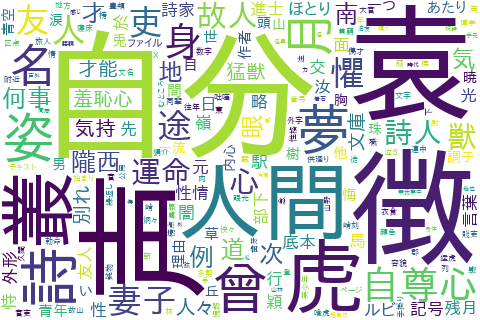

In [16]:
URL = "https://www.aozora.gr.jp/cards/000119/files/624_ruby_5668.zip"
text = load_from_url(URL)
words = get_words(text)
fpath='/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'
wc = WordCloud(background_color="white", width=480, height=320, font_path=fpath)
wc.generate(words)
wc.to_file("wc.png")
IPython.display.Image("wc.png")

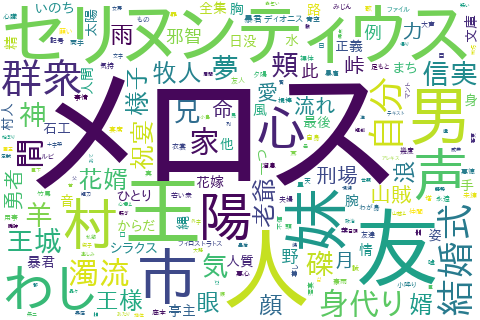

In [ ]:
URL = "https://www.aozora.gr.jp/cards/000035/files/1567_ruby_4948.zip"
text = load_from_url(URL)
words = get_words(text)
fpath='/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'
wc = WordCloud(background_color="white", width=480, height=320, font_path=fpath)
wc.generate(words)
wc.to_file("wc.png")
IPython.display.Image("wc.png")